In [1]:
#install the Kaggle library
!pip install Kaggle

In [2]:
# configure the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Kaggle API
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:10<00:00, 113MB/s]
100% 812M/812M [00:10<00:00, 83.9MB/s]


In [4]:
!ls

cat.jpeg  dog.jpg  dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
#Extract the compressed dataset
from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Data Exploration and Preprocessing:**

In [6]:
#Extract the training data
from zipfile import ZipFile
dataset= '/content/train.zip'

with ZipFile( dataset, 'r') as zip:
  zip.extractall()
  print('Training data has been extracted')


Training data has been extracted


In [7]:
import os
#count the number of files in the train folder
path, dirs, files= next(os.walk('/content/train'))
file_count=len(files)

print("Number of Images: ", file_count)

Number of Images:  25000


In [8]:
#Print the names of the images
file_names=os.listdir('/content/train')
print(file_names)

['cat.5415.jpg', 'dog.6352.jpg', 'cat.11209.jpg', 'dog.1134.jpg', 'dog.10947.jpg', 'dog.10354.jpg', 'dog.9424.jpg', 'cat.4285.jpg', 'dog.5164.jpg', 'dog.3113.jpg', 'cat.12364.jpg', 'dog.3264.jpg', 'dog.9514.jpg', 'cat.6964.jpg', 'dog.7229.jpg', 'cat.5819.jpg', 'dog.263.jpg', 'dog.7070.jpg', 'dog.3601.jpg', 'dog.8653.jpg', 'cat.12347.jpg', 'dog.9024.jpg', 'dog.8544.jpg', 'cat.5289.jpg', 'dog.1723.jpg', 'dog.10873.jpg', 'cat.6204.jpg', 'cat.4791.jpg', 'dog.6105.jpg', 'dog.7190.jpg', 'dog.5663.jpg', 'dog.4502.jpg', 'cat.3035.jpg', 'dog.7683.jpg', 'cat.2676.jpg', 'dog.6721.jpg', 'cat.5508.jpg', 'cat.10637.jpg', 'dog.5835.jpg', 'dog.7679.jpg', 'dog.3269.jpg', 'cat.10200.jpg', 'dog.12078.jpg', 'dog.9857.jpg', 'dog.1179.jpg', 'dog.6826.jpg', 'cat.1423.jpg', 'dog.8977.jpg', 'cat.315.jpg', 'dog.49.jpg', 'dog.7727.jpg', 'cat.3132.jpg', 'cat.9504.jpg', 'dog.6463.jpg', 'cat.4317.jpg', 'dog.5776.jpg', 'dog.9367.jpg', 'cat.11361.jpg', 'cat.9486.jpg', 'dog.6533.jpg', 'cat.3147.jpg', 'cat.7062.jpg', '

In [10]:
#import the essential libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

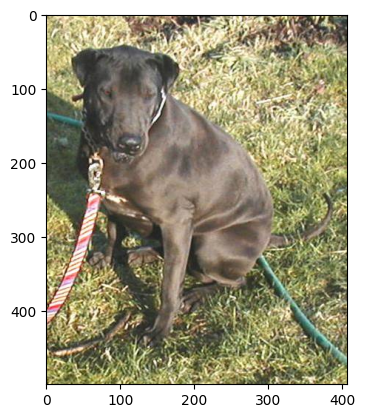

In [11]:
#display dog image
img=mpimg.imread('/content/train/dog.6352.jpg')
imgplt=plt.imshow(img)
plt.show()

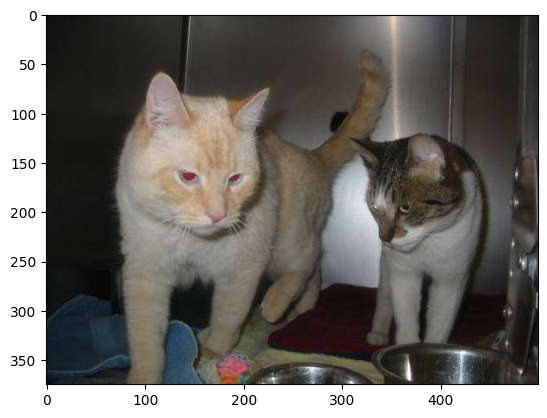

In [12]:
#display cat image
img=mpimg.imread('/content/train/cat.5415.jpg')
imgplt=plt.imshow(img)
plt.show()

In [13]:
for i in range(5):
  name=file_names[i]
  print(name[0:3])

cat
dog
cat
dog
dog


In [14]:
#count the no. of dog and cat images in train data
dog_count=0
cat_count=0

for img_file in file_names:
  name=img_file[0:3]

  if name=='dog':
    dog_count +=1

  else:
    cat_count +=1

print("Number of dog images:", dog_count)
print("Number of cat images", cat_count)

Number of dog images: 12500
Number of cat images 12500


**Resize the images:**

In [15]:
#create a new directory for resized images
os.mkdir('/content/image resized')

In [16]:
original_folder='/content/train/'
resized_folder='/content/image resized/'

for i in range(2000): # We will use transfer learning, hence we will use only 2000 images during training

  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224, 224))  #Resize the image
  img=img.convert('RGB')

  newImgPath= resized_folder+filename
  #Save the resized image to the new directory
  img.save(newImgPath)



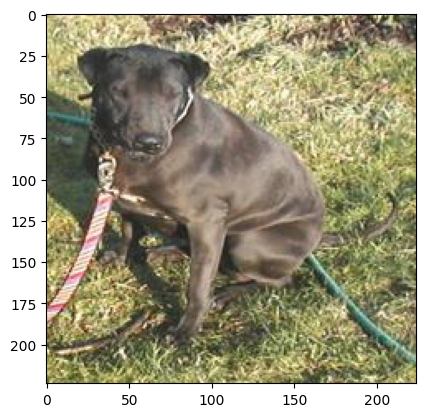

In [17]:
#display  resized dog image
img=mpimg.imread('/content/image resized/dog.6352.jpg')
imgplt=plt.imshow(img)
plt.show()

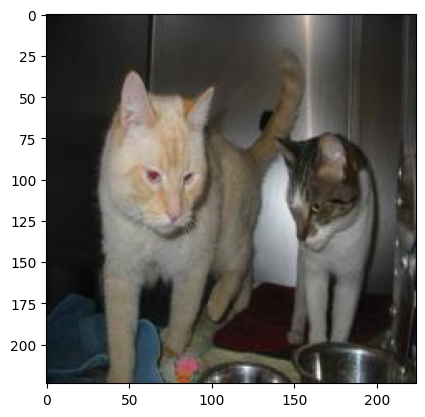

In [18]:

#display resized cat image
img=mpimg.imread('/content/image resized/cat.5415.jpg')
imgplt=plt.imshow(img)
plt.show()

**Create labels for resized images of dogs and cats:**

Cat -> 0

Dog -> 1

In [19]:
#Loop to assign labels
filenames=os.listdir('/content/image resized/')

labels=[] # list to store the labels (0 and 1)

for i in range (2000):

  file_name=filenames[i]
  label= file_name[0:3]

  if label =='dog':
    labels.append(1)

  else:
    labels.append(0)

In [20]:
print(filenames[0:5])
print(len(filenames))

['cat.5415.jpg', 'dog.6352.jpg', 'cat.11209.jpg', 'dog.1134.jpg', 'dog.10947.jpg']
2000


In [21]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 1, 1]
2000


In [22]:
#count the number of cat and dog images out of the 2000 images
values, counts= np.unique(labels, return_counts=True)

print(values)
print(counts)

[0 1]
[ 965 1035]


In [23]:
# Initialize an empty list to store images
images = []

# Loop through each filename
for i in range(2000):
    filename = filenames[i]

    # Read the image and convert it to a numpy array
    img_path = resized_folder + filename
    img = Image.open(img_path)
    img_array = np.array(img)

    # Append the image to the list
    images.append(img_array)

# Convert the list of images to a numpy array
images_array = np.array(images)


In [24]:
type(images_array)

numpy.ndarray

In [25]:
#Convert the corresponding labels into numpy array
labels_array = np.array(labels)

In [26]:
print(labels_array)

[0 1 0 ... 0 0 1]


In [27]:
print("Images array shape: ", images_array.shape)
print("Labels array shape: ", labels_array.shape)

Images array shape:  (2000, 224, 224, 3)
Labels array shape:  (2000,)


In [28]:
#Define the features and target
X=images_array
Y=labels_array

In [29]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [30]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [31]:
#Scale the data
X_train_scaled= X_train/255   # Maximum value of a pixel= 255
X_test_scaled=X_test/255

In [32]:
print(X_train_scaled)

[[[[0.47058824 0.34901961 0.13333333]
   [0.47058824 0.34901961 0.13333333]
   [0.47058824 0.34901961 0.13333333]
   ...
   [0.76078431 0.63137255 0.55686275]
   [0.78039216 0.65098039 0.57647059]
   [0.80392157 0.6745098  0.6       ]]

  [[0.47058824 0.34901961 0.13333333]
   [0.47058824 0.34901961 0.13333333]
   [0.47058824 0.34901961 0.13333333]
   ...
   [0.77254902 0.64313725 0.56862745]
   [0.78823529 0.65882353 0.58431373]
   [0.80784314 0.67843137 0.60392157]]

  [[0.47058824 0.34901961 0.13333333]
   [0.47058824 0.34901961 0.13333333]
   [0.47058824 0.34901961 0.13333333]
   ...
   [0.79607843 0.66666667 0.59215686]
   [0.80392157 0.6745098  0.6       ]
   [0.81568627 0.68627451 0.61176471]]

  ...

  [[0.45098039 0.39607843 0.29411765]
   [0.44705882 0.39215686 0.29019608]
   [0.45098039 0.38823529 0.28627451]
   ...
   [0.18039216 0.14901961 0.10588235]
   [0.18431373 0.15294118 0.10980392]
   [0.18431373 0.15294118 0.10980392]]

  [[0.45490196 0.4        0.29803922]
   [0.4

In [33]:
import tensorflow as tf
import tensorflow_hub as hub



In [34]:
#Dowload the mobilenet model
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model=hub.KerasLayer(mobilenet_model, input_shape= (224, 224, 3), trainable=False)   #Freeze the convolutional base

**Build and Compile the model:**

In [35]:
#Build the model using transfer learning

model=tf.keras.Sequential([
  pretrained_model, #pretrained model
  tf.keras.layers.Dense(1, activation='sigmoid') #output layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [36]:
#compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
    )

**Training the model:**

In [37]:
#Train the model
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 10s 51ms/step - loss: 0.2822 - accuracy: 0.8925
Epoch 2/5
50/50 [==============================] - 2s 46ms/step - loss: 0.0896 - accuracy: 0.9769
Epoch 3/5
50/50 [==============================] - 2s 44ms/step - loss: 0.0667 - accuracy: 0.9794
Epoch 4/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0539 - accuracy: 0.9850
Epoch 5/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0452 - accuracy: 0.9875


**Model Evaluation:**

In [38]:
#Evaluate the model
from sklearn.metrics import classification_report

# Get the predictions
y_pred = model.predict(X_test_scaled)

# Convert the probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(Y_test, y_pred_binary))

# Evaluate the model and print the test loss and accuracy
score, acc = model.evaluate(X_test_scaled, Y_test)
print(f'Test Loss: {score:.4f}')
print(f'Test Accuracy: {acc:.4f}')


13/13 [==============================] - 2s 108ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       188
           1       0.99      1.00      0.99       212

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

13/13 [==============================] - 2s 47ms/step - loss: 0.0335 - accuracy: 0.9925
Test Loss: 0.0335
Test Accuracy: 0.9925


**Build the Prediction System:**

Enter the path of the image to be predicted: /content/dog.jpg


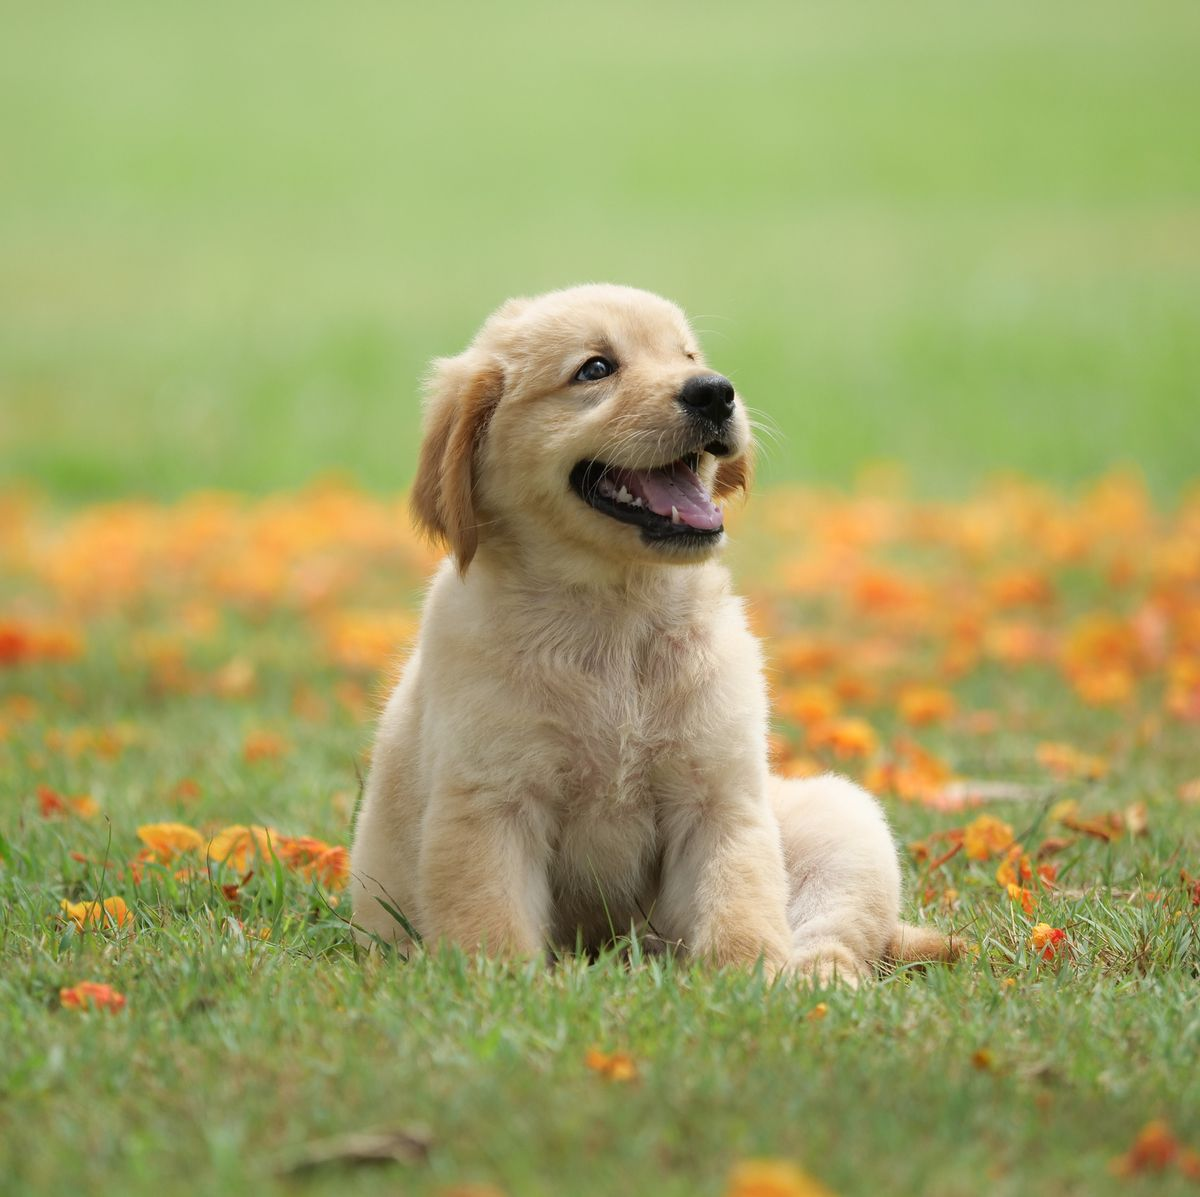

1/1 [==============================] - 1s 822ms/step
It's a Dog


In [39]:
import cv2

image_path = input("Enter the path of the image to be predicted: ")  #Get the path of the input image

input_image = cv2.imread(image_path)
cv2_imshow(input_image)  #Display the input image

resized_input_image = cv2.resize(input_image, (224, 224))  #resize the image
scaled_input_image = resized_input_image / 255  #Scale the image
image_reshaped = np.reshape(scaled_input_image, [1, 224, 224, 3])  #Reshape the image

prediction = model.predict(image_reshaped)  #get the prediction made by the model

# Print the result based on the prediction (probability)
if prediction[0][0] < 0.5:
    print("It's a Cat")
else:
    print("It's a Dog")
